In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
# Load data

DATA_PATH = 'data/'
movies_summaries_df = pd.read_csv(DATA_PATH + 'plot_summaries.txt', delimiter='\t', header=None, names=['id', 'summary'])
movies_names_df = pd.read_csv(DATA_PATH + 'name.clusters.txt', delimiter='\t', header=None, names=['name', 'id'])
movies_categories_df = pd.read_csv(DATA_PATH + 'tvtropes.clusters.txt', delimiter='\t', header=None, names=['id', 'meta'])
charaters_df = pd.read_csv(DATA_PATH + 'character.metadata.tsv', delimiter='\t', header=None, names=['movie_wiki_id', 'movie_id', 'movie_release_date', 'name', 'actor_birth_date', 'actor_gender', 'actor_height','actor_ethinicity_id', 'actor_name', 'actor_age', 'actor_map_id', 'id', 'actor_id']) 
movies_df = pd.read_csv(DATA_PATH + 'movie.metadata.tsv', delimiter='\t', header=None, names=['wiki_id', 'id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'])

In [3]:
movies_summaries_df.head()

,id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [4]:
movies_names_df.head()

,name,id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [5]:
movies_categories_df.head()

,id,meta
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [6]:
charaters_df.head()

,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
movies_df.head()

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


## Idea of things to check:

- How many films have a unique wiki_id (and what exactly is a wiki_id)
- What is the span of years of our data ? Are there times not well represented ?
- What is the proportion of films for each continent ? 
- What is the proportion of films in English in total ? 

## Goals (17 November 2023)

(1) Readme (up to 1000 words) with the detailed project proposal  
(2) Notebook with initial analyses and data handling pipelines (_A data pipeline is a process that involves ingesting raw data from numerous data sources and then transferring it to a data repository, such as a data lake or data warehouse, for analysis._)

In [8]:
USA_movies = movies_df[movies_df['countries'].str.contains('United States of America')]
USA_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34408 entries, 0 to 81738
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wiki_id       34408 non-null  int64  
 1   id            34408 non-null  object 
 2   name          34408 non-null  object 
 3   release_date  33197 non-null  object 
 4   revenue       6936 non-null   float64
 5   runtime       29509 non-null  float64
 6   languages     34408 non-null  object 
 7   countries     34408 non-null  object 
 8   genres        34408 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.6+ MB


In [9]:
import json

df = movies_df.copy()

# Get the countries of each movie
df['countries'] = df['countries'].apply(lambda x: list(json.loads(x).values()))
df['countries'] = df['countries'].apply(lambda x: x[0] if len(x) > 0 else None)

# Count the number of movies per country
movies_per_country = df.explode('countries')

movies_per_country = movies_per_country.groupby('countries').count()['id'].reset_index()
movies_per_country = movies_per_country.rename(columns={'id': 'movies_count'})
movies_per_country = movies_per_country.sort_values('movies_count', ascending=False)

# Save them into a csv file
movies_per_country.to_csv('movies_per_country.csv', index=False)

movies_per_country.head()

,countries,movies_count
123,United States of America,34118
51,India,8294
122,United Kingdom,5477
40,France,3996
60,Japan,2321


In [13]:
movies_df_single_country = movies_df.copy()

# Duplicate movies associated with multiple countries
movies_df_single_country = movies_df_single_country.assign(countries=movies_df_single_country['countries'].str.split(',')).explode('countries')
movies_df_single_country = movies_df_single_country.reset_index(drop=True)
movies_df_single_country['countries'] = movies_df_single_country['countries'].apply(lambda x: x.split(":")[-1].strip(" '\"}") if isinstance(x, str) and ':' in x else x)

movies_df_single_country.head()

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,"{""/m/07s9rl0"": ""Drama""}"


In [44]:
movies_df_single_country[movies_df_single_country["name"]=="Special Effects"]

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres
34,27611999,/m/04j284s,Special Effects,1984,NaN,93.0,{},United States of America,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."
35,27611999,/m/04j284s,Special Effects,1984,NaN,93.0,{},United Kingdom,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."


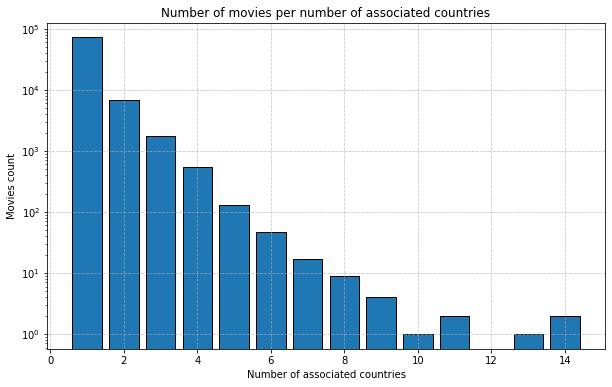

In [14]:
# Count number of countries associated with each movie
countries_per_movie = movies_df_single_country.groupby('id')['countries'].count().reset_index()
countries_per_movie = countries_per_movie.rename(columns={'countries': 'country_count'})
film_count_by_country_count = countries_per_movie['country_count'].value_counts().sort_index()

# Plot count of movies associated with different countries
plt.figure(figsize=(10, 6))
plt.bar(film_count_by_country_count.index, film_count_by_country_count.values, edgecolor='k')
plt.xlabel('Number of associated countries')
plt.ylabel('Movies count')
plt.title('Number of movies per number of associated countries')
plt.grid(linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

In [16]:
film_countries_dict = {}

# Iterate through the DataFrame to populate the dictionary
for index, row in movies_df_single_country.iterrows():
    film_id = row['id']
    country = row['countries']
    
    # Check if the film_id is already in the dictionary
    if film_id in film_countries_dict:
        film_countries_dict[film_id].append(country)
    else:
        film_countries_dict[film_id] = [country]

# Convert the dictionary to a DataFrame if needed
film_countries_df = pd.DataFrame(film_countries_dict.items(), columns=['film_id', 'countries'])

# Display the DataFrame
films_associated_with_several_countries = film_countries_df[film_countries_df['countries'].apply(lambda x: len(x) > 1)]
films_associated_with_several_countries.head()

,film_id,countries
26,/m/05pckh0,"[France, Italy]"
33,/m/04j284s,"[United States of America, United Kingdom]"
38,/m/0b6c_nw,"[Australia, New Zealand]"
47,/m/0b6kc_5,"[United States of America, Netherlands]"
53,/m/02vlsqt,"[Mexico, United States of America]"


In [17]:
# Group the countries into 4 groups:
#  - Northen America (Fuck yeah) = United States of America, Canada
#  - Europe = United Kingdom, France, Italy, Germany, Spain, West Germany, Belgium, German Democratic Republic, Ireland, Switzerland, Austria, England, Luxembourg, Portugal
#  - Asia = Japan, Hong Kong, China, South Korea, Taiwan
#  - India = India, Pakistan
#  Africa - Not enough movies

groups = {
	"Northen America": set(["United States of America", "Canada"]),
	"Europe": set(["United Kingdom", "France", "Italy", "Germany", "Spain", "West Germany", "Belgium", "German Democratic Republic", "Ireland", "Switzerland", "Austria", "England", "Luxembourg", "Portugal"]),
	"Asia": set(["Japan", "Hong Kong", "China", "South Korea", "Taiwan"]),
	"India": set(["India", "Pakistan"])
}

def group_movie(x):
	for group, countries in groups.items():
		if x in countries:
			return group
	return None

# Replace the countries of the movies by the area name and remove the movies that are not in the groups
grouped_df = df.copy()
grouped_df['group'] = grouped_df["countries"].apply(lambda x: group_movie(x))
grouped_df.head()

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres,group
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Northen America
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Northen America
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Europe
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,"{""/m/07s9rl0"": ""Drama""}",Europe


In [21]:
filtered_movies_df = movies_df_single_country.copy()

# Remove films associated with a least one country not in our group (not sure if we should do it)
mask = ~filtered_movies_df['countries'].isin({country for group_countries in groups.values() for country in group_countries})
films_not_in_groups = movies_df_single_country[mask]['id'].unique()

filtered_movies_df = filtered_movies_df[~filtered_movies_df['id'].isin(films_not_in_groups)]
filtered_movies_df =  filtered_movies_df[['id', 'countries']]

filtered_movies_df.head()

,id,countries
0,/m/03vyhn,United States of America
1,/m/08yl5d,United States of America
3,/m/0285_cd,United Kingdom
4,/m/01mrr1,Germany
5,/m/03cfc81,United States of America


In [26]:
# Pivot matrix showing occurences when two countries are associated to a same film
grouped_countries = filtered_movies_df.groupby('id')['countries'].agg(list).reset_index()

country_pairs_count = {}

# Iterate over rows and update the dictionary
for _, row in grouped_countries.iterrows():
    countries = row['countries']
    # Use combinations to get all unique pairs of countries within each 'id'
    pairs = list(combinations(countries, 2))
    for pair in pairs:
        country_pairs_count[pair] = country_pairs_count.get(pair, 0) + 1
        

# Convert the dictionary to a DataFrame
count_df = pd.DataFrame.from_dict(country_pairs_count, orient='index', columns=['Count']).reset_index()
array = [np.array([elm[0], elm[1]]) for elm in count_df['index']]
count_df['Country1'] = [elm[0] for elm in count_df['index']]
count_df['Country2'] = [elm[1] for elm in count_df['index']]

# Creating the pivot table
pivot_table = pd.pivot_table(count_df, values='Count', index='Country1', columns='Country2', fill_value=0)

Country2,Austria,Belgium,Canada,China,England,France,German Democratic Republic,Germany,Hong Kong,India,...,Luxembourg,Pakistan,Portugal,South Korea,Spain,Switzerland,Taiwan,United Kingdom,United States of America,West Germany
Country1,,,,,,,,,,,,,,,,,,,,,
Austria,0,1,4,0,1,3,0,66,0,1,...,4,1,0,0,0,0,0,18,1,21
Belgium,1,0,5,0,0,3,0,14,1,0,...,15,0,1,0,7,5,0,22,3,6
Canada,0,0,0,3,5,2,0,88,0,6,...,5,0,1,5,0,0,1,183,0,0
China,0,0,0,0,0,1,0,10,1,0,...,1,0,0,9,0,0,57,6,0,0
England,0,0,0,1,0,1,0,5,0,0,...,0,0,0,0,1,0,0,140,0,0


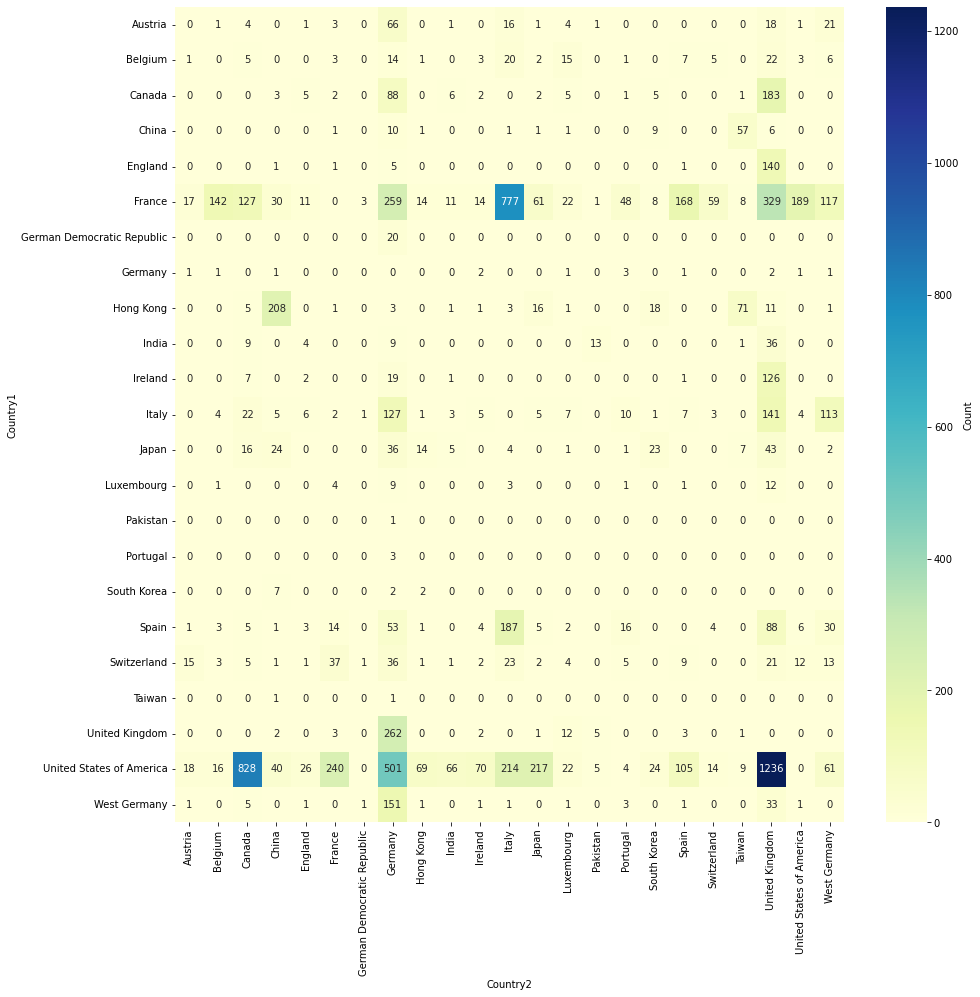

In [27]:
# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Count'})
plt.show()

In [28]:
def is_same_group(countries):
    for group in groups.values():
        if set(countries).issubset(group):
            return True
    return False

# Filter the DataFrame to keep only movies associated with at least two countries which do no belong to the same group
filtered_df = grouped_countries[grouped_countries['countries'].apply(lambda x: not is_same_group(x))]
filtered_df.head()

,id,countries
11,/m/011yg9,"[United States of America, United Kingdom]"
12,/m/011yhm,"[United States of America, United Kingdom]"
22,/m/011ywj,"[United States of America, Italy, United Kingdom]"
29,/m/01242_,"[United States of America, Ireland, United Kin..."
30,/m/0125xq,"[France, United States of America]"


In [30]:
country_pairs_count = {}

# Iterate over rows and update the dictionary
for _, row in filtered_df.iterrows():
    countries = row['countries']
    # Use combinations to get all unique pairs of countries within each 'id'
    pairs = list(combinations(countries, 2))
    for pair in pairs:
        country_pairs_count[pair] = country_pairs_count.get(pair, 0) + 1
        

# Convert the dictionary to a DataFrame
count_df = pd.DataFrame.from_dict(country_pairs_count, orient='index', columns=['Count']).reset_index()
array = [np.array([elm[0], elm[1]]) for elm in count_df['index']]
count_df['Country1'] = [elm[0] for elm in count_df['index']]
count_df['Country2'] = [elm[1] for elm in count_df['index']]

# Creating the pivot table
pivot_table = pd.pivot_table(count_df, values='Count', index='Country1', columns='Country2', fill_value=0)

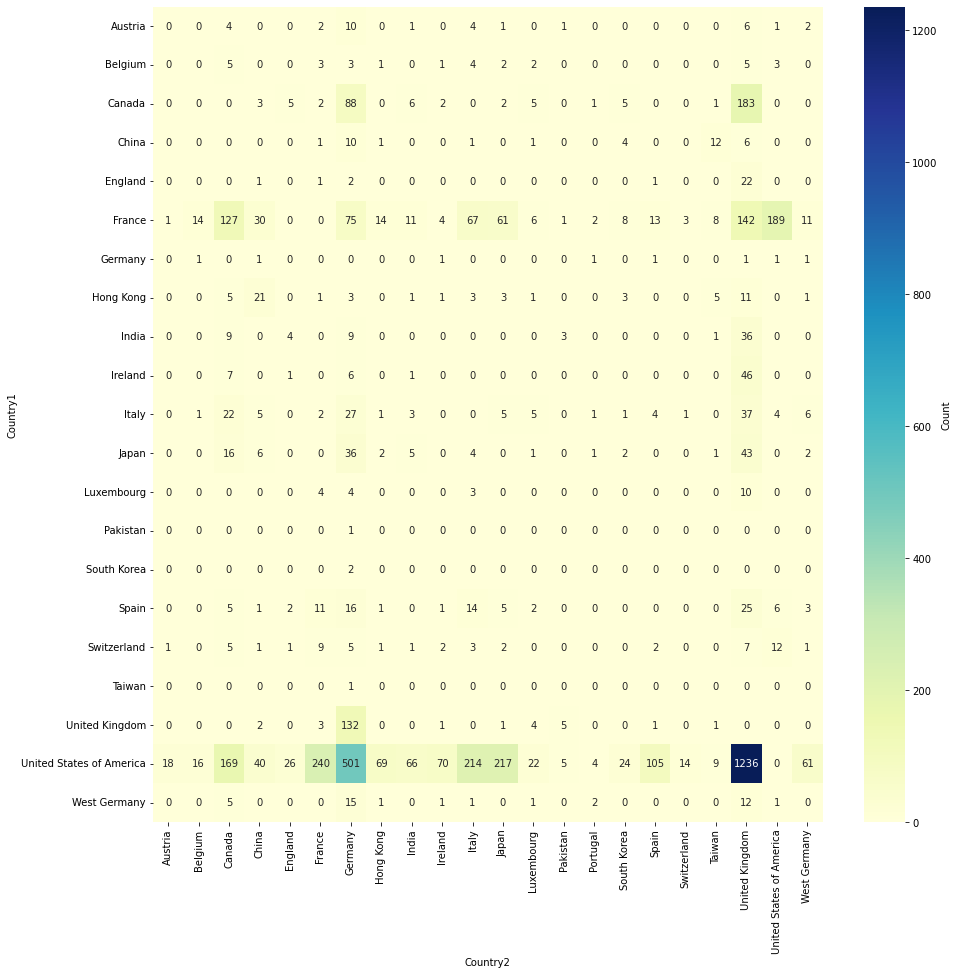

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Count'})
plt.show()

In [34]:
def map_to_group(country):
    for group, countries in groups.items():
        if country in countries:
            return group
    return country

# Replace country names with group names
filtered_df_group = filtered_df.copy()
filtered_df_group['group'] = filtered_df_group['countries'].apply(lambda x: [map_to_group(country) for country in x])
filtered_df_group.head()

,id,countries,group
11,/m/011yg9,"[United States of America, United Kingdom]","[Northen America, Europe]"
12,/m/011yhm,"[United States of America, United Kingdom]","[Northen America, Europe]"
22,/m/011ywj,"[United States of America, Italy, United Kingdom]","[Northen America, Europe, Europe]"
29,/m/01242_,"[United States of America, Ireland, United Kin...","[Northen America, Europe, Europe]"
30,/m/0125xq,"[France, United States of America]","[Europe, Northen America]"


In [42]:
# Only keep unique group combinations and count their occurence
unique_combinations = Counter(tuple(x) for x in filtered_df_group['group'])
unique_combination_keys = list(unique_combinations.keys())
unique_combination_count = unique_combinations.values()

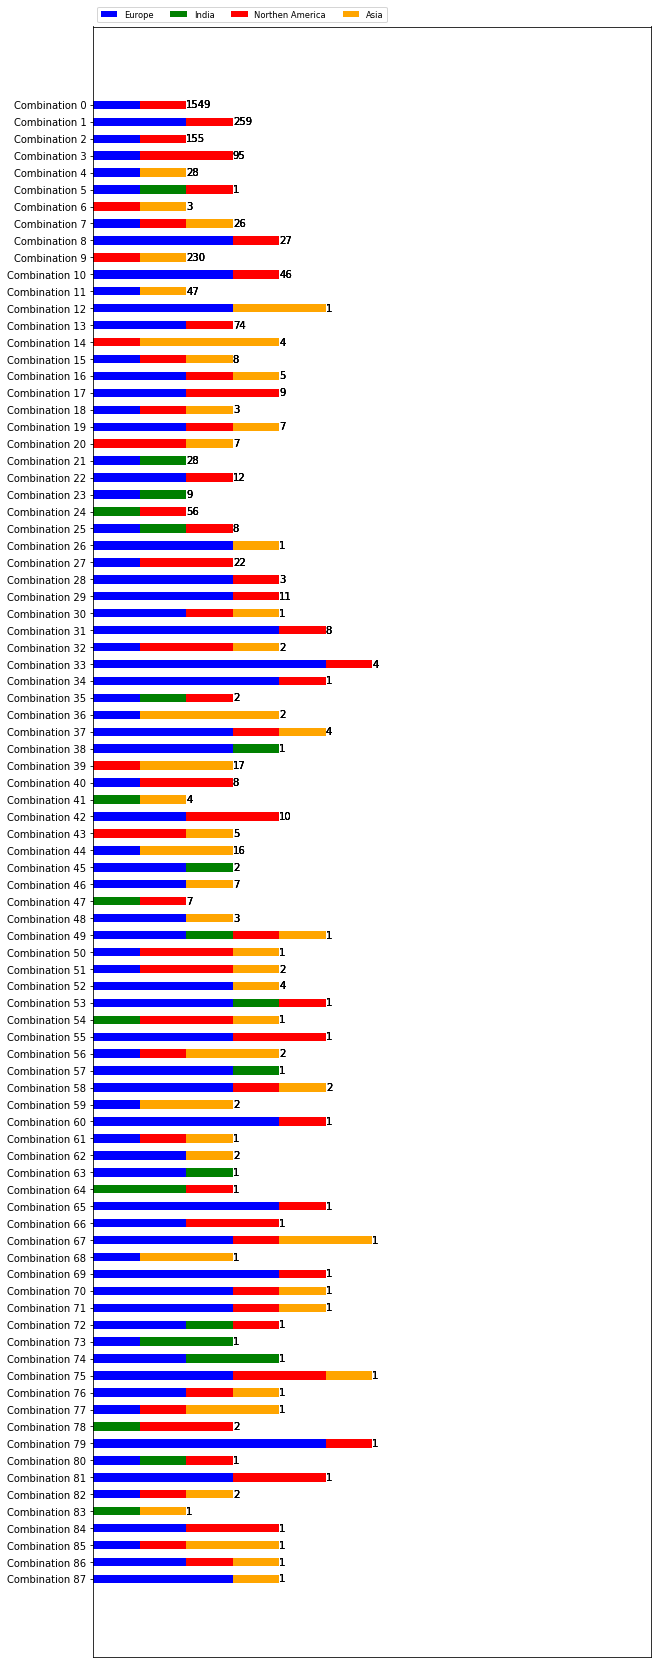

In [43]:
# Get unique groups
unique_groups = list(set(group for sublist in unique_combination_keys for group in sublist))

# Iterate through each list in data and plot a horizontal stacked bar
category_names = []

results = {}
for i, sublist in enumerate (unique_combinations):
    sublist_counts = {group: sublist.count(group) for group in unique_groups}
    if i == 0:
        category_names = sublist_counts.keys()
    results[f'Combination {i}'] = list(sublist_counts.values())

    
labels = list(results.keys())
data = np.array(list(results.values()))
data_sum = np.sum(data, axis=1)
count = np.array(list(unique_combination_count))
data_cum = data.cumsum(axis=1)
category_colors = ['blue', 'green','red','orange']
nbr_bars = np.arange(len(count))

fig, ax = plt.subplots(figsize=(10, 30))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())


for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = (data[:, i])/2
    starts = data_cum[:, i]/2 - widths
    bars = ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    for i, count_val in enumerate (count):
        ax.text(data_sum[i]/2, nbr_bars[i] , str(count_val), ha='left', va='center')

ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='small')